In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,4,Australia,India,0.1,0,0,Rajkot,Saurashtra Cricket Association Stadium
1,4,Australia,India,0.2,0,0,Rajkot,Saurashtra Cricket Association Stadium
2,4,Australia,India,0.3,4,0,Rajkot,Saurashtra Cricket Association Stadium
3,4,Australia,India,0.4,1,0,Rajkot,Saurashtra Cricket Association Stadium
4,4,Australia,India,0.5,0,0,Rajkot,Saurashtra Cricket Association Stadium
...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore,Gaddafi Stadium
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore,Gaddafi Stadium
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore,Gaddafi Stadium
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore,Gaddafi Stadium


In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8671
venue                  0
dtype: int64

In [5]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        3092
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [6]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [7]:
df['city'] = cities

In [8]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,4,Australia,India,0.1,0,0,Rajkot
1,4,Australia,India,0.2,0,0,Rajkot
2,4,Australia,India,0.3,4,0,Rajkot
3,4,Australia,India,0.4,1,0,Rajkot
4,4,Australia,India,0.5,0,0,Rajkot
...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore


In [11]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [12]:
df = df[df['city'].isin(eligible_cities)]

In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,7,South Africa,India,0.1,3,0,Johannesburg
1,7,South Africa,India,0.2,0,0,Johannesburg
2,7,South Africa,India,0.3,1,0,Johannesburg
3,7,South Africa,India,0.4,1,0,Johannesburg
4,7,South Africa,India,0.5,4,0,Johannesburg
...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore


In [14]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

/tmp/ipykernel_3953/1598928411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['current_score'] = df.groupby('match_id').cumsum()['runs']
/tmp/ipykernel_3953/1598928411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [15]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,7,South Africa,India,0.1,3,0,Johannesburg,3
1,7,South Africa,India,0.2,0,0,Johannesburg,3
2,7,South Africa,India,0.3,1,0,Johannesburg,4
3,7,South Africa,India,0.4,1,0,Johannesburg,5
4,7,South Africa,India,0.5,4,0,Johannesburg,9
...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore,144
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore,145
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore,146
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore,147


In [16]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

/tmp/ipykernel_3953/2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
/tmp/ipykernel_3953/2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,7,South Africa,India,0.1,3,0,Johannesburg,3,0,1
1,7,South Africa,India,0.2,0,0,Johannesburg,3,0,2
2,7,South Africa,India,0.3,1,0,Johannesburg,4,0,3
3,7,South Africa,India,0.4,1,0,Johannesburg,5,0,4
4,7,South Africa,India,0.5,4,0,Johannesburg,9,0,5
...,...,...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore,144,19,2
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore,145,19,3
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore,146,19,4
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore,147,19,5


In [17]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

/tmp/ipykernel_3953/562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,7,South Africa,India,0.1,3,0,Johannesburg,3,0,1,1
1,7,South Africa,India,0.2,0,0,Johannesburg,3,0,2,2
2,7,South Africa,India,0.3,1,0,Johannesburg,4,0,3,3
3,7,South Africa,India,0.4,1,0,Johannesburg,5,0,4,4
4,7,South Africa,India,0.5,4,0,Johannesburg,9,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore,144,19,2,116
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore,145,19,3,117
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore,146,19,4,118
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore,147,19,5,119


In [18]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

/tmp/ipykernel_3953/2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
/tmp/ipykernel_3953/2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,7,South Africa,India,0.1,3,0,Johannesburg,3,0,1,1,119
1,7,South Africa,India,0.2,0,0,Johannesburg,3,0,2,2,118
2,7,South Africa,India,0.3,1,0,Johannesburg,4,0,3,3,117
3,7,South Africa,India,0.4,1,0,Johannesburg,5,0,4,4,116
4,7,South Africa,India,0.5,4,0,Johannesburg,9,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,0,Lahore,144,19,2,116,4
124,964,Sri Lanka,Pakistan,19.3,1,0,Lahore,145,19,3,117,3
125,964,Sri Lanka,Pakistan,19.4,1,0,Lahore,146,19,4,118,2
126,964,Sri Lanka,Pakistan,19.5,1,0,Lahore,147,19,5,119,1


In [19]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

/tmp/ipykernel_3953/540685528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
/tmp/ipykernel_3953/540685528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
/tmp/ipykernel_3953/540685528.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify nume

In [20]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,7,South Africa,India,0.1,3,0,Johannesburg,3,0,1,1,119,10
1,7,South Africa,India,0.2,0,0,Johannesburg,3,0,2,2,118,10
2,7,South Africa,India,0.3,1,0,Johannesburg,4,0,3,3,117,10
3,7,South Africa,India,0.4,1,0,Johannesburg,5,0,4,4,116,10
4,7,South Africa,India,0.5,4,0,Johannesburg,9,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,6,Lahore,144,19,2,116,4,4
124,964,Sri Lanka,Pakistan,19.3,1,6,Lahore,145,19,3,117,3,4
125,964,Sri Lanka,Pakistan,19.4,1,6,Lahore,146,19,4,118,2,4
126,964,Sri Lanka,Pakistan,19.5,1,6,Lahore,147,19,5,119,1,4


In [21]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

/tmp/ipykernel_3953/914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [22]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,7,South Africa,India,0.1,3,0,Johannesburg,3,0,1,1,119,10,18.000000
1,7,South Africa,India,0.2,0,0,Johannesburg,3,0,2,2,118,10,9.000000
2,7,South Africa,India,0.3,1,0,Johannesburg,4,0,3,3,117,10,8.000000
3,7,South Africa,India,0.4,1,0,Johannesburg,5,0,4,4,116,10,7.500000
4,7,South Africa,India,0.5,4,0,Johannesburg,9,0,5,5,115,10,10.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,6,Lahore,144,19,2,116,4,4,7.448276
124,964,Sri Lanka,Pakistan,19.3,1,6,Lahore,145,19,3,117,3,4,7.435897
125,964,Sri Lanka,Pakistan,19.4,1,6,Lahore,146,19,4,118,2,4,7.423729
126,964,Sri Lanka,Pakistan,19.5,1,6,Lahore,147,19,5,119,1,4,7.411765


In [23]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

/tmp/ipykernel_3953/3055083752.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['batting_team', 'bowling_team', 'city'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())


In [24]:
df['last_five'] = last_five

/tmp/ipykernel_3953/1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [25]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,7,South Africa,India,0.1,3,0,Johannesburg,3,0,1,1,119,10,18.000000,NaN
1,7,South Africa,India,0.2,0,0,Johannesburg,3,0,2,2,118,10,9.000000,NaN
2,7,South Africa,India,0.3,1,0,Johannesburg,4,0,3,3,117,10,8.000000,NaN
3,7,South Africa,India,0.4,1,0,Johannesburg,5,0,4,4,116,10,7.500000,NaN
4,7,South Africa,India,0.5,4,0,Johannesburg,9,0,5,5,115,10,10.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,964,Sri Lanka,Pakistan,19.2,0,6,Lahore,144,19,2,116,4,4,7.448276,41.0
124,964,Sri Lanka,Pakistan,19.3,1,6,Lahore,145,19,3,117,3,4,7.435897,41.0
125,964,Sri Lanka,Pakistan,19.4,1,6,Lahore,146,19,4,118,2,4,7.423729,41.0
126,964,Sri Lanka,Pakistan,19.5,1,6,Lahore,147,19,5,119,1,4,7.411765,41.0


In [26]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

/tmp/ipykernel_3953/3687880561.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')


In [27]:
temp = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

/tmp/ipykernel_3953/3657411421.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')


In [28]:
temp=temp[['match_id','batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]
temp

,match_id,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
0,7,South Africa,India,Johannesburg,3,119,10,18.000000,NaN,219
1,7,South Africa,India,Johannesburg,3,118,10,9.000000,NaN,219
2,7,South Africa,India,Johannesburg,4,117,10,8.000000,NaN,219
3,7,South Africa,India,Johannesburg,5,116,10,7.500000,NaN,219
4,7,South Africa,India,Johannesburg,9,115,10,10.800000,NaN,219
...,...,...,...,...,...,...,...,...,...,...
50111,964,Sri Lanka,Pakistan,Lahore,144,4,4,7.448276,41.0,147
50112,964,Sri Lanka,Pakistan,Lahore,145,3,4,7.435897,41.0,147
50113,964,Sri Lanka,Pakistan,Lahore,146,2,4,7.423729,41.0,147
50114,964,Sri Lanka,Pakistan,Lahore,147,1,4,7.411765,41.0,147


In [29]:
pickle.dump(temp,open('dataset_level3.pkl','wb'))

In [30]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [31]:
final_df.dropna(inplace=True)

In [32]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [33]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
29,South Africa,India,Johannesburg,42,92,9,9.000000,42.0,219
30,South Africa,India,Johannesburg,43,91,9,8.896552,40.0,219
31,South Africa,India,Johannesburg,47,90,9,9.400000,44.0,219
32,South Africa,India,Johannesburg,48,89,9,9.290323,44.0,219
33,South Africa,India,Johannesburg,50,88,9,9.375000,45.0,219
...,...,...,...,...,...,...,...,...,...
50111,Sri Lanka,Pakistan,Lahore,144,4,4,7.448276,41.0,147
50112,Sri Lanka,Pakistan,Lahore,145,3,4,7.435897,41.0,147
50113,Sri Lanka,Pakistan,Lahore,146,2,4,7.423729,41.0,147
50114,Sri Lanka,Pakistan,Lahore,147,1,4,7.411765,41.0,147


In [34]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [35]:
type(final_df)

pandas.core.frame.DataFrame

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from math import sqrt

In [37]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [38]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])

In [39]:
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
y_pred
print(r2_score(y_test,y_pred)) 
print(mean_absolute_error(y_test,y_pred))
print(sqrt(mean_absolute_error(y_test,y_pred)))

/home/astthecoder/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9887088719975998
1.62903220144354
1.2763354580374002


In [40]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

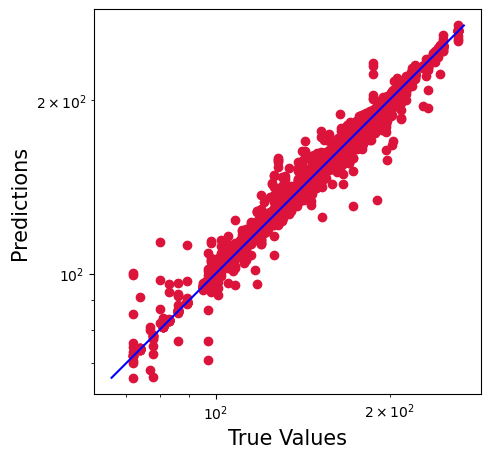

In [57]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

/tmp/ipykernel_3953/2362905049.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
/tmp/ipykernel_3953/2362905049.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" 

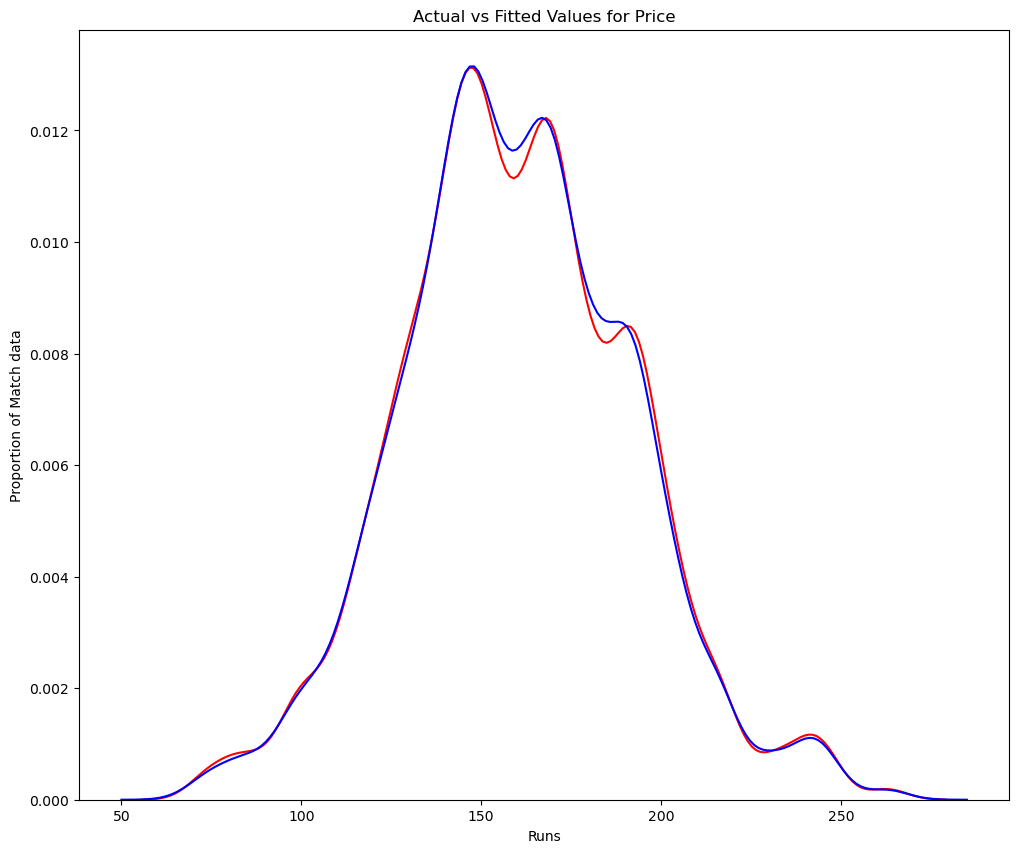

In [55]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values')
plt.xlabel('Runs')
plt.ylabel('Proportion of Match data')

plt.show()
plt.close()